# Calculate pine fragrance notes

In [1]:
import pandas as pd
from pom_models.functions import fragance_propabilities_from_smiles

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [11]:
import numpy as np

In [2]:
df = pd.read_csv("intensities.csv")
df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-],ODT (theory) [mg/m^3],OV (theory) [-]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,...,2.344229e+04,4.07100,136.125201,1.019800,0.281,5.448859,7346.889389,1348.335352,0.295,24904.709794
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,...,2.344229e+04,4.58100,136.125201,1.019800,0.237,2.686762,3363.807109,1251.993079,9.300,361.699689
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,...,3.715352e+04,2.21000,220.182715,0.921445,0.049,0.000000,0.000000,NaN,NaN,NaN
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,...,3.467369e+06,0.04863,204.187801,1.041275,0.048,0.000000,0.000000,NaN,NaN,NaN
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,...,2.344229e+04,6.27500,136.125201,1.015911,0.034,3.481921,860.255616,247.063528,NaN,NaN


In [5]:
top_5_df = df.nlargest(5, "OV [-]")
top_5_df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-],ODT (theory) [mg/m^3],OV (theory) [-]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.071,...,23442.288153,4.071,136.125201,1.019800,0.281,5.448859,7346.889389,1348.335352,0.295,24904.709794
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.581,...,23442.288153,4.581,136.125201,1.019800,0.237,2.686762,3363.807109,1251.993079,9.300,361.699689
10,Myrcene,123-35-3,0.021,β-Myrcene,2.3±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,2.3,4.58,https://legacy.chemspider.com/Chemical-Structu...,6.923,...,38018.939632,6.923,136.125201,1.201470,0.021,1.355377,425.083406,313.627406,NaN,NaN
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.275,...,23442.288153,6.275,136.125201,1.015911,0.034,3.481921,860.255616,247.063528,NaN,NaN
8,Terpinolene,586-62-9,0.026,TERPINOLENE,1.1±0.2 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.1,4.67,https://legacy.chemspider.com/Chemical-Structu...,3.838,...,46773.514129,3.838,136.125201,1.028665,0.026,0.960591,215.503397,224.344482,NaN,NaN


In [19]:
combined_probs = np.zeros(138)
for i, smiles in enumerate(top_5_df["smiles"]):
    probs = fragance_propabilities_from_smiles(smiles)[0]
    weight = list(top_5_df["OV [-]"])[i]
    combined_probs += probs*weight 

combined_probs /= max(combined_probs)
max(combined_probs)

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

1.0

In [21]:
indices = np.argsort(-combined_probs)
indices

array([ 64, 137,  60,  53,  51,  21,  45,  82,  50, 119, 126,  38, 123,
         4,  30,  99,  31,  58,  23, 110, 125,  86,   5,  85,  73,  44,
        72, 128, 124,  87,  74,  14, 132,  78, 112,  98, 131,  10, 130,
         1,  88, 104,   9,  94,  83,  80, 133,  24,   6,  71,  90, 121,
        56, 117, 114,  75,  16,  69,  95, 107,  39, 135,  62, 134,  92,
        59,  47, 109,  66,   8, 105, 108,  65,   7, 118,  13, 103,  52,
        15,  67,  49, 101,  18,  33,  46,  96, 116,  77,  70,  37, 100,
       113,  41, 111, 106,  79,  93,  40,  28,  48, 102,  29,  26,  63,
        22,  91,  84,  57,  97,  35, 115, 127,  55,  61, 122,  12,   3,
        32,  68,  20,   2, 120,  81,  43,  34, 136,  11,  54,  27,  17,
        25,  19,  76, 129,   0,  42,  89,  36], dtype=int64)

In [23]:
combined_probs[36]

0.053490778526089966

In [27]:
data_df = pd.read_csv("data.csv")
labels = data_df.keys()[2:]

In [30]:
data=[]
labels_lst = []
for i in indices[:8]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([1.0,
  0.9116239746249578,
  0.8436857437873271,
  0.8353954138790792,
  0.8291759493139683,
  0.8173883893687041,
  0.8038509007105703,
  0.7471598074280685],
 ['herbal',
  'woody',
  'green',
  'fruity',
  'fresh',
  'camphoreous',
  'earthy',
  'mint'])

In [31]:
from pycirclize import Circos
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pine"],
    columns=labels_lst,
)
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint
Pine,1.0,0.911624,0.843686,0.835395,0.829176,0.817388,0.803851,0.74716


In [ ]:
target_df = df.loc[1]

<Figure size 1600x1600 with 0 Axes>

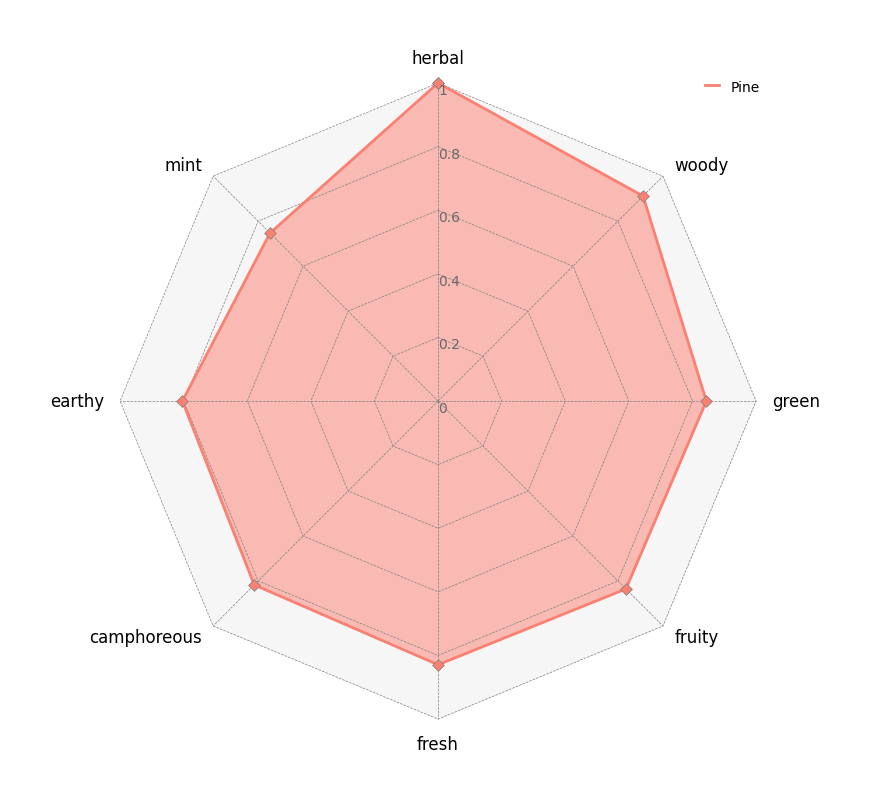

In [39]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=6,
    cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)



In [40]:
data=[]
labels_lst = []
for i in indices[-8:]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([0.11176600858800427,
  0.1076950788006572,
  0.10667194417456177,
  0.10373256630610647,
  0.09767870041683852,
  0.09219750783982789,
  0.08067871686180358,
  0.053490778526089966],
 ['chamomile',
  'buttery',
  'malty',
  'vanilla',
  'alcoholic',
  'cucumber',
  'odorless',
  'cognac'])

In [41]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pine"],
    columns=labels_lst,
)
df_plot

,chamomile,buttery,malty,vanilla,alcoholic,cucumber,odorless,cognac
Pine,0.111766,0.107695,0.106672,0.103733,0.097679,0.092198,0.080679,0.053491


<Figure size 1600x1600 with 0 Axes>

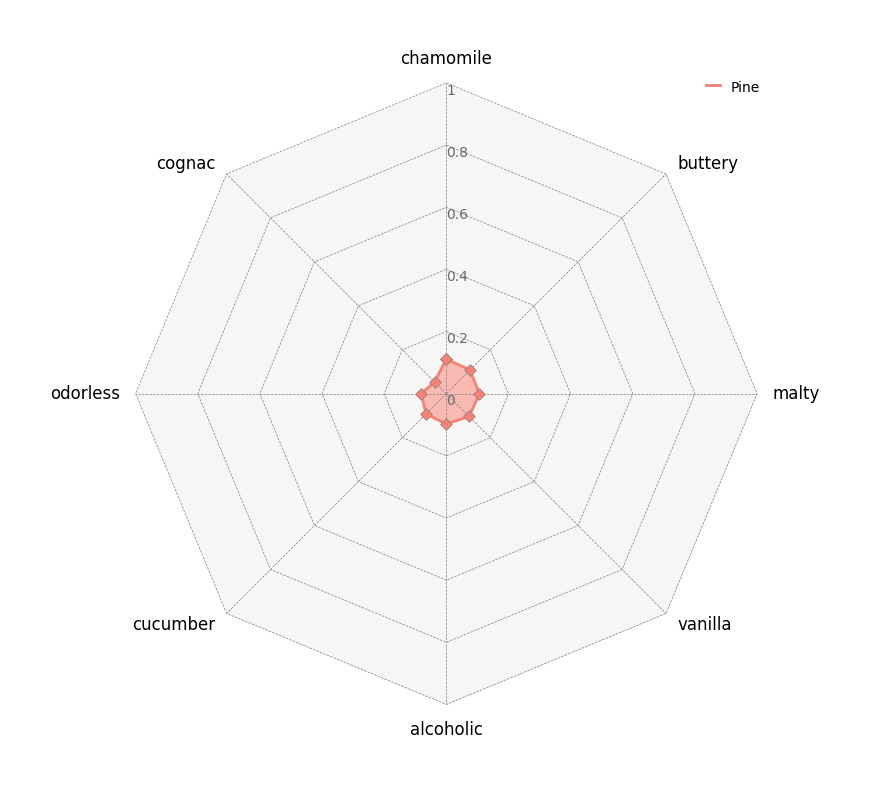

In [42]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=6,
    cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)

In [49]:
data=[]
labels_lst = []
for i in indices:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([1.0,
  0.9116239746249578,
  0.8436857437873271,
  0.8353954138790792,
  0.8291759493139683,
  0.8173883893687041,
  0.8038509007105703,
  0.7471598074280685,
  0.7336221358041463,
  0.7132968139962329,
  0.576351517415057,
  0.5650010883536962,
  0.5522937959828704,
  0.5457641714724338,
  0.5204170608542602,
  0.4970634631328254,
  0.48984912026316396,
  0.48108597748294196,
  0.47894540400404967,
  0.4600357104575472,
  0.4513305879585121,
  0.45013824382673795,
  0.43570555113664716,
  0.43045034921069947,
  0.422701298887306,
  0.42107716189850747,
  0.4196199052609002,
  0.4163615864615153,
  0.3998807966910066,
  0.39622285682401576,
  0.3850147641681498,
  0.38321145518648947,
  0.3654303678096842,
  0.3617342503012678,
  0.35317703002701323,
  0.35233856734538144,
  0.35065541748599355,
  0.34618586699648907,
  0.34374966380036365,
  0.34041943853127477,
  0.33499947591279544,
  0.329345842196867,
  0.3261567082510823,
  0.3163569362030351,
  0.3088002167720113,
  0.30774375

In [50]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pine"],
    columns=labels_lst,
)
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint,floral,spicy,...,cherry,brandy,chamomile,buttery,malty,vanilla,alcoholic,cucumber,odorless,cognac
Pine,1.0,0.911624,0.843686,0.835395,0.829176,0.817388,0.803851,0.74716,0.733622,0.713297,...,0.116289,0.112798,0.111766,0.107695,0.106672,0.103733,0.097679,0.092198,0.080679,0.053491


<Figure size 1600x1600 with 0 Axes>

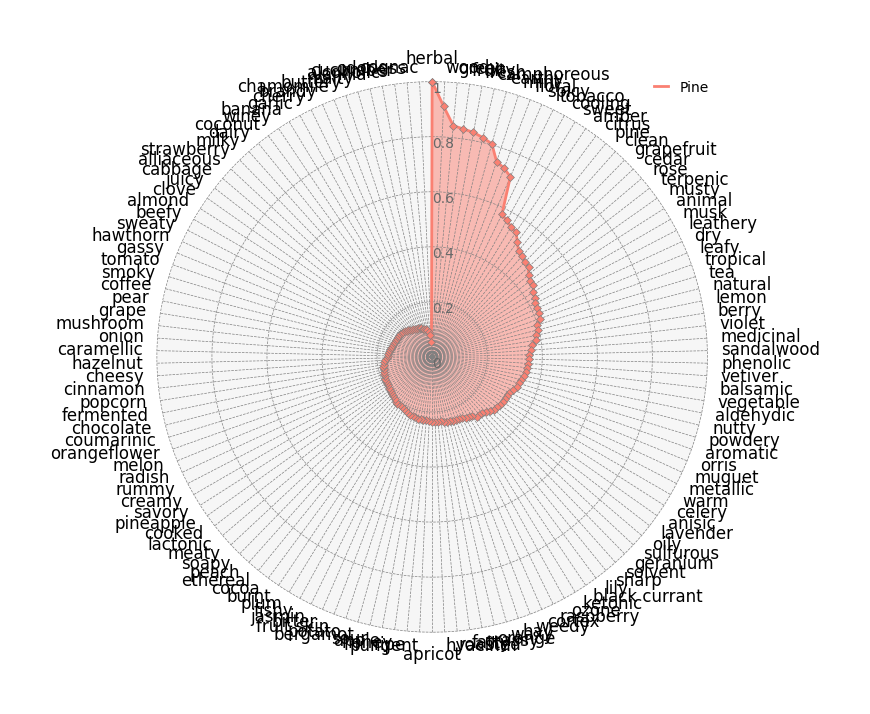

In [53]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=4,
    cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)

In [43]:
import json

In [46]:
list(combined_probs)

[0.09767870041683852,
 0.34041943853127477,
 0.13537424940297899,
 0.1434393086305416,
 0.5457641714724338,
 0.43570555113664716,
 0.30385631283859377,
 0.23049853105550783,
 0.23462328526109724,
 0.3261567082510823,
 0.34618586699648907,
 0.11805460952078142,
 0.14445150922111713,
 0.22507430716381469,
 0.38321145518648947,
 0.22021288969682026,
 0.25895397609761284,
 0.11279752670652814,
 0.21239175176759223,
 0.1076950788006572,
 0.1396124236434364,
 0.8173883893687041,
 0.1606025415806953,
 0.47894540400404967,
 0.30580879931658034,
 0.11176600858800427,
 0.17190776528469484,
 0.11628880074971476,
 0.18212596545374646,
 0.175233203253928,
 0.5204170608542602,
 0.48984912026316396,
 0.14174673877753355,
 0.21172306578558345,
 0.12293566287619614,
 0.1519240909194767,
 0.053490778526089966,
 0.1957605988824479,
 0.5650010883536962,
 0.2477219963432311,
 0.18446745366497527,
 0.18996689570714395,
 0.09219750783982789,
 0.1259151271766653,
 0.42107716189850747,
 0.8038509007105703,
 0.

In [54]:
from rdkit import Chem

In [95]:
with open("pine_target.json", "w") as file:
    json.dump(list(combined_probs), file)

In [87]:
mol_dict = {}
for i, smiles in enumerate(top_5_df["smiles"]):
    probs = fragance_propabilities_from_smiles(smiles)[0]
    weight = list(top_5_df["OV [-]"])[i]
    mol = Chem.MolFromSmiles(smiles)
    
    data_cut=[]
    for j in indices[:8]:
        data_cut.append(probs[j])
    mol_dict[i] = {
        "probs":probs,
        "weight":weight,
        "mol": mol,
        "name": f"{list(top_5_df['name'])[i]} {int(weight)}",
        "probs_cut":data_cut
    }


mol_dict  

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

{0: {'probs': array([0.05670923, 0.1808126 , 0.08197895, 0.08702368, 0.368816  ,
         0.28906935, 0.1939773 , 0.12383256, 0.13714284, 0.20857213,
         0.21608219, 0.06222109, 0.0904218 , 0.11692098, 0.21969016,
         0.13282096, 0.151262  , 0.06394777, 0.13178556, 0.05468661,
         0.08635738, 0.5468689 , 0.09600006, 0.32499614, 0.18578288,
         0.05791685, 0.09458174, 0.06483571, 0.10935425, 0.09815679,
         0.28712583, 0.3117603 , 0.08703233, 0.12712975, 0.06545702,
         0.09906447, 0.02921791, 0.12333379, 0.3650019 , 0.14245135,
         0.11580265, 0.10129152, 0.04067011, 0.06503242, 0.25957048,
         0.53182274, 0.1257142 , 0.12817447, 0.1106156 , 0.13208714,
         0.41869864, 0.51095164, 0.12759477, 0.48822594, 0.0729863 ,
         0.08150066, 0.1547815 , 0.08300035, 0.30056456, 0.13264032,
         0.50306195, 0.08587615, 0.15309407, 0.10244449, 0.6213371 ,
         0.13225503, 0.14059685, 0.11147289, 0.06884795, 0.15039413,
         0.11304887, 0

In [65]:
data=[]
labels_lst = []
for i in indices[:8]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([1.0,
  0.9116239746249578,
  0.8436857437873271,
  0.8353954138790792,
  0.8291759493139683,
  0.8173883893687041,
  0.8038509007105703,
  0.7471598074280685],
 ['herbal',
  'woody',
  'green',
  'fruity',
  'fresh',
  'camphoreous',
  'earthy',
  'mint'])

In [73]:
len(mol_dict.keys())

5

In [79]:
[val["name"] for val in mol_dict.values()]

['alpha-Pinene', 'delta-3-Carene', 'Myrcene', 'Camphene', 'Terpinolene']

In [88]:
df_plot = pd.DataFrame(
    data=[
        data] +[
        val["probs_cut"] for val in mol_dict.values()
    ],
    index=["Pine"] + [val["name"] for val in mol_dict.values()],
    columns=labels_lst,
)
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint
Pine,1.000000,0.911624,0.843686,0.835395,0.829176,0.817388,0.803851,0.747160
alpha-Pinene 1348,0.621337,0.583002,0.503062,0.488226,0.510952,0.546869,0.531823,0.474452
delta-3-Carene 1251,0.641944,0.560214,0.531425,0.494507,0.524497,0.529645,0.514406,0.510373
Myrcene 313,0.533750,0.399887,0.642173,0.730840,0.506355,0.204269,0.305198,0.262815
Camphene 247,0.596999,0.607630,0.466937,0.515080,0.482821,0.594434,0.501646,0.464523
Terpinolene 224,0.572994,0.613622,0.439584,0.480758,0.468356,0.413610,0.424360,0.364949


<Figure size 1600x1600 with 0 Axes>

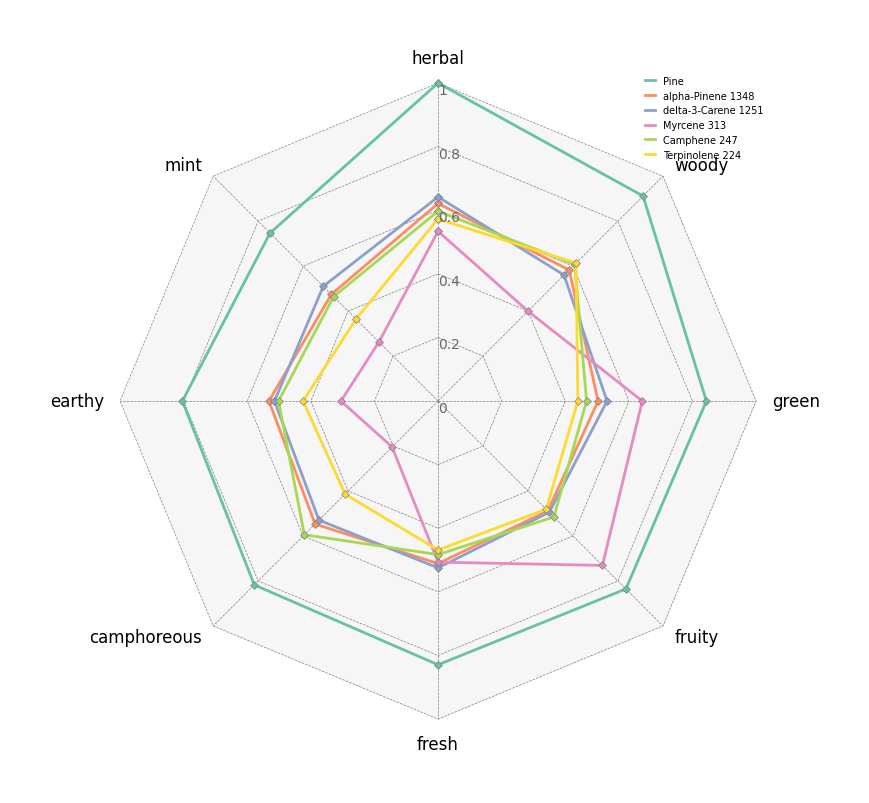

In [93]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=4,
    fill=False,
    #cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=7)